# Process Weather Data

Weather data was downloaded from the NOAA Climate Data Online Platform (https://www.ncdc.noaa.gov/cdo-web/). In the portal you can search for historical data and download data in CSVs. I have downloaded csvs comprising data for years 2010-2019 in 3 different chunks.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
!ls data_files/weather

1872484.csv                 2010-2019_daily_weather.csv
1872492.csv                 2010-2019_daily_weather.pkl
1872495.csv


# Inspecting the data

First, let's take a look at one of the csvs.

In [3]:
csv_files = ['1872484.csv', '1872492.csv', '1872495.csv']

data = pd.read_csv('data_files/weather/%s' % csv_files[0])
  

In [4]:
# Column names
data.columns

Index(['STATION', 'NAME', 'DATE', 'AWND', 'DAPR', 'MDPR', 'PGTM', 'PRCP',
       'SNOW', 'SNWD', 'TAVG', 'TMAX', 'TMIN', 'TOBS', 'WDF2', 'WDF5', 'WESD',
       'WESF', 'WSF2', 'WSF5', 'WT01', 'WT02', 'WT03', 'WT04', 'WT05', 'WT06',
       'WT08', 'WT09', 'WT11'],
      dtype='object')

In [5]:
data.head()

,STATION,NAME,DATE,AWND,DAPR,MDPR,PGTM,PRCP,SNOW,SNWD,...,WSF5,WT01,WT02,WT03,WT04,WT05,WT06,WT08,WT09,WT11
0,US1WAJF0015,"PORT LUDLOW 3.6 S, WA US",2016-01-02,NaN,NaN,NaN,NaN,0.00,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,US1WAJF0015,"PORT LUDLOW 3.6 S, WA US",2016-01-04,NaN,NaN,NaN,NaN,0.04,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,US1WAJF0015,"PORT LUDLOW 3.6 S, WA US",2016-01-05,NaN,NaN,NaN,NaN,0.09,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,US1WAJF0015,"PORT LUDLOW 3.6 S, WA US",2016-01-06,NaN,NaN,NaN,NaN,0.21,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,US1WAJF0015,"PORT LUDLOW 3.6 S, WA US",2016-01-07,NaN,NaN,NaN,NaN,0.01,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
data.describe()

,AWND,DAPR,MDPR,PGTM,PRCP,SNOW,SNWD,TAVG,TMAX,TMIN,...,WSF5,WT01,WT02,WT03,WT04,WT05,WT06,WT08,WT09,WT11
count,6708.000000,3058.000000,3051.000000,5420.000000,127224.000000,57321.000000,17614.000000,1353.000000,19649.00000,19606.000000,...,6717.000000,1545.0,100.0,62.0,12.0,26.0,1.0,206.0,1.0,15.0
mean,6.278074,5.266841,0.651891,1347.310517,0.131624,0.048124,0.527353,54.121951,60.50145,44.772417,...,20.157972,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
std,2.951090,5.745566,1.016687,585.647465,0.275835,0.512139,2.374595,10.875604,13.82395,9.645717,...,7.302514,0.0,0.0,0.0,0.0,0.0,NaN,0.0,NaN,0.0
min,0.220000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,27.000000,21.00000,9.000000,...,6.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
25%,4.250000,2.000000,0.040000,1058.000000,0.000000,0.000000,0.000000,46.000000,50.00000,38.000000,...,15.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
50%,5.820000,3.000000,0.310000,1409.000000,0.000000,0.000000,0.000000,54.000000,60.00000,45.000000,...,19.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
75%,7.610000,6.000000,0.810000,1726.000000,0.140000,0.000000,0.000000,63.000000,71.00000,52.000000,...,23.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
max,23.940000,59.000000,11.250000,2359.000000,5.500000,36.000000,36.000000,81.000000,117.00000,87.000000,...,59.900000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [7]:
data.groupby('NAME').count()

,STATION,DATE,AWND,DAPR,MDPR,PGTM,PRCP,SNOW,SNWD,TAVG,...,WSF5,WT01,WT02,WT03,WT04,WT05,WT06,WT08,WT09,WT11
NAME,,,,,,,,,,,,,,,,,,,,,
"AUBURN 3.5 NW, WA US",123,123,0,12,12,0,111,26,0,0,...,0,0,0,0,0,0,0,0,0,0
"AUBURN 4.8 ENE, WA US",273,273,0,0,0,0,273,138,0,0,...,0,0,0,0,0,0,0,0,0,0
"AUBURN 8.2 SE, WA US",1295,1295,0,19,19,0,1276,533,26,0,...,0,0,0,0,0,0,0,0,0,0
"BAINBRIDGE ISLAND 2.4 SW, WA US",1183,1183,0,38,37,0,1145,595,20,0,...,0,0,0,0,0,0,0,0,0,0
"BAINBRIDGE ISLAND 2.6 NNW, WA US",1082,1082,0,59,59,0,1024,232,3,0,...,0,0,0,0,0,0,0,0,0,0
"BAINBRIDGE ISLAND 2.6 NW, WA US",806,806,0,38,38,0,768,434,11,0,...,0,0,0,0,0,0,0,0,0,0
"BELFAIR 3.2 WSW, WA US",1006,1006,0,3,3,0,1002,518,1,0,...,0,0,0,0,0,0,0,0,0,0
"BELLEVUE 0.8 S, WA US",164,164,0,6,6,0,158,72,0,0,...,0,0,0,0,0,0,0,0,0,0
"BELLEVUE 1.1 SE, WA US",344,344,0,24,24,0,321,213,1,0,...,0,0,0,0,0,0,0,0,0,0


It looks like there isn't much data for a lot of the columns. But, we are only interested in a few of the columns (temperature, precipitation). We can ignore most of the columns.

There are also a lot of different locations. Let's see which ones are in seattle.

In [8]:
data[data['NAME'].str.contains('SEATTLE')].groupby('NAME').count().sort_values('STATION')

,STATION,DATE,AWND,DAPR,MDPR,PGTM,PRCP,SNOW,SNWD,TAVG,...,WSF5,WT01,WT02,WT03,WT04,WT05,WT06,WT08,WT09,WT11
NAME,,,,,,,,,,,,,,,,,,,,,
"SEATTLE 0.9 SSE, WA US",28,28,0,0,0,0,28,15,0,0,...,0,0,0,0,0,0,0,0,0,0
"SEATTLE 4.5 NNE, WA US",61,61,0,0,0,0,61,16,0,0,...,0,0,0,0,0,0,0,0,0,0
"SEATTLE 5.6 NNE, WA US",71,71,0,2,2,0,69,17,0,0,...,0,0,0,0,0,0,0,0,0,0
"SEATTLE 3.7 SSW, WA US",120,120,0,6,6,0,114,0,5,0,...,0,0,0,0,0,0,0,0,0,0
"SEATTLE 5.3 NNE, WA US",130,130,0,2,2,0,128,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"SEATTLE 5.0 NNW, WA US",156,156,0,39,39,0,117,5,0,0,...,0,0,0,0,0,0,0,0,0,0
"SEATTLE 2.7 NE, WA US",186,186,0,57,57,0,129,79,51,0,...,0,0,0,0,0,0,0,0,0,0
"SEATTLE 3.9 SSW, WA US",269,269,0,6,6,0,263,2,0,0,...,0,0,0,0,0,0,0,0,0,0
"SEATTLE 6.1 NNE, WA US",301,301,0,7,7,0,295,122,0,0,...,0,0,0,0,0,0,0,0,0,0


There are a lot in seattle, but it looks like only two locations have all of the data. Since the Sand Point weather forecast center is actually in seattle (not SeaTac), I will solely use this one.

In [9]:
num_cols = ['PRCP', 'SNOW', 'TAVG', 'TMAX', 'TMIN']

all_data = []

for csv_file in csv_files:
    seattle = pd.read_csv('data_files/weather/%s' % csv_file,
                       usecols=['STATION', 'NAME', 'DATE', 'PRCP', 'SNOW', 'TAVG', 'TMAX', 'TMIN'])
    seattle = seattle[seattle['NAME'] == 'SEATTLE SAND POINT WEATHER FORECAST OFFICE, WA US']

    # convert to appropriate data types and append to array of dataframes
    seattle[num_cols] = seattle[num_cols].apply(pd.to_numeric)
    seattle[['DATE']] = seattle[['DATE']].apply(pd.to_datetime)  
    all_data.append(seattle)

In [10]:
weather = pd.concat(all_data).set_index('DATE')[num_cols]

In [11]:
weather.sort_index(inplace=True)

In [12]:
weather['TAVG'] = (weather['TMAX'] + weather['TMIN'])/2

In [13]:
weather.head()

,PRCP,SNOW,TAVG,TMAX,TMIN
DATE,,,,,
2010-01-01,0.36,0.0,48.5,52.0,45.0
2010-01-02,0.03,0.0,46.0,50.0,42.0
2010-01-03,0.02,0.0,45.0,48.0,42.0
2010-01-04,0.71,0.0,46.0,48.0,44.0
2010-01-05,0.07,0.0,46.5,48.0,45.0


/Users/bethanys08/.pyenv/versions/anaconda3-2019.03/lib/python3.7/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


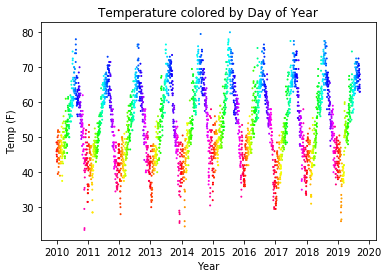

In [14]:
plt.figure(1)
plt.scatter(weather.index, weather.TAVG, s=1, c=weather.index.dayofyear, cmap='hsv')
plt.xlabel('Year')
plt.ylabel('Temp (F)')
plt.title('Temperature colored by Day of Year')
plt.show()

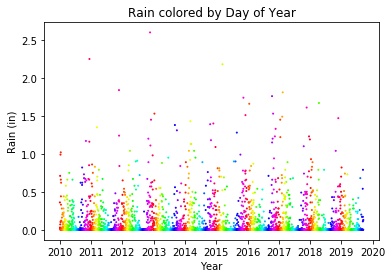

In [15]:
plt.figure(2)
plt.scatter(weather.index, weather.PRCP, s=1, c=weather.index.dayofyear, cmap='hsv')
plt.xlabel('Year')
plt.ylabel('Rain (in)')
plt.title('Rain colored by Day of Year')
plt.show()

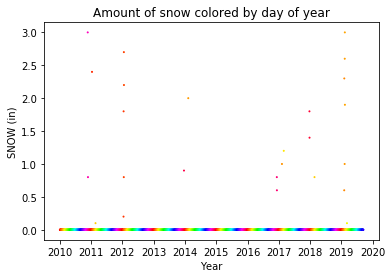

In [16]:
plt.figure(3)
plt.scatter(weather.index, weather.SNOW, s=1, c=weather.index.dayofyear, cmap='hsv')
plt.xlabel('Year')
plt.ylabel('SNOW (in)')
plt.title('Amount of snow colored by day of year')
plt.show()

In [17]:
weather.to_csv('data_files/weather/2010-2019_daily_weather.csv')

In [18]:
weather.to_pickle('data_files/weather/2010-2019_daily_weather.pkl')